## Warmup Exercise for multiple Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Beer & Chips

### Generating Model I

$$
\begin{aligned}
\text{Headache}  &= 0.5 \cdot \text{Beers} +   0.1 \cdot \text{Chips} + \text{otherFactors} \\
y_i &= \beta_0 + \beta_1 \cdot x_{i,1} + \beta_2 \cdot x_{i,2}+ u_i
\end{aligned}
$$


-----------------------

$$
\begin{aligned}
\text{Beers}_i & \sim \text{Pois}(3)/2 \\
\text{Chips}_i &= 15 \cdot \text{Beers}_i + v_i  \\
u_i & \sim N(0,0.5), v_i \sim N(0,2.5)
\end{aligned}
$$

1. Fit the following two simple linear regressions (Try both sklearn and statsmodels)
    * $\hat{y_i} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_{i,1}$
    * $\hat{y_i} = \hat{\beta}_0  + \hat{\beta}_2 \cdot x_{i,2}$
   
2. Think about what happens when you set the variations to zero, one by one respectively: $u_i \sim N(0,0), v_i \sim N(0,0)$

3. Fit a multiple linear regression model and compare the coefficients:
    * $\hat{y_i} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_{i,1} + \hat{\beta}_2 \cdot x_{i,2}$

In [3]:
#get used to generating random numbers from different distributions:

from scipy.stats import poisson
from scipy.stats import norm


#norm.rvs(scale=2,size=10)
poisson.rvs(2, size=10)

array([2, 1, 2, 2, 1, 3, 4, 2, 2, 2])

In [27]:
N=100
np.random.seed(123)
NumBeers = poisson.rvs(3, size=N)/2

v = norm.rvs(scale=2.5,size=N)
NumChips = 15*NumBeers + v
NumChips[NumChips<0] = 0

u=norm.rvs(scale=0.5,size=N)
Headache = 0.5*NumBeers + 0.1*NumChips  + u
Headache[Headache<0] = 0

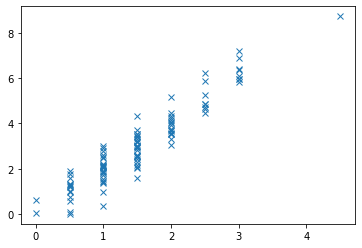

In [4]:
plt.plot(NumBeers, Headache, "x");

### Solution

#### statsmodels

In [4]:
def SimBeerChips(N=100, sv = 2.5, su = 0.5):

    NumBeers = poisson.rvs(3, size=N)/2

    v = norm.rvs(scale=sv,size=N)
    NumChips = 15*NumBeers + v
    NumChips[NumChips<0] = 0

    u=norm.rvs(scale=su,size=N)
    Headache = 0.5*NumBeers + 0.1*NumChips  + u
    Headache[Headache<0] = 0
    BeerChips_df = pd.DataFrame({'Beers':NumBeers, 'Chips':NumChips, 'Headache':Headache})
    return(BeerChips_df)
    
    
BeerChips_df = SimBeerChips(N=100, sv = 2.5, su = 0.5)
BeerChips_df.head()

,Beers,Chips,Headache
0,2.0,29.463188,3.388375
1,1.5,22.912381,1.651932
2,2.5,37.987722,5.178443
3,1.5,20.682481,2.989375
4,0.5,8.215905,0.871654


In [24]:
np.random.seed(123)
BeerChips_df = SimBeerChips(sv = 0, su = 0)
slr1 = smf.ols('Headache ~ Beers', BeerChips_df).fit()
slr1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,8.743e-16,1.92e-16,4.548,0.000,4.93e-16,1.26e-15
Beers,2.0000,1.12e-16,1.79e+16,0.000,2.000,2.000


In [5]:
np.random.seed(123)
BeerChips_df = SimBeerChips(sv = 2.5, su = 0.5)
slr1 = smf.ols('Headache ~ Beers', BeerChips_df).fit()
slr1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0478,0.124,-0.385,0.701,-0.294,0.199
Beers,2.0308,0.072,28.050,0.000,1.887,2.175


In [16]:
slr2 = smf.ols('Headache ~ Chips', BeerChips_df).fit()
slr2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.0134,0.105,0.128,0.899,-0.195,0.222
Chips,0.1351,0.004,32.811,0.000,0.127,0.143


In [32]:
np.random.seed(123)
BeerChips_df = SimBeerChips(sv = 2.5, su = 0.5)

mlr1 = smf.ols('Headache ~ Beers + Chips', BeerChips_df).fit()
mlr1.summary()#.tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Headache   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     535.2
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           3.97e-53
Time:                        15:33:20   Log-Likelihood:                -71.479
No. Observations:                 100   AIC:                             149.0
Df Residuals:                      97   BIC:                             156.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0032      0.108     -0.029      0.977      -0.218       0.212
Beers          0.2070      0.327      0.633      0.528      -0.442       0.856
Chips          0.1218      0.021      5.683      0.000       0.079       0.164
==============================================================================
Omnibus:                        2.160   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                2.131
Skew:                          -0.295   Prob(JB):                        0.345
Kurtosis:                       2.595   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### sklearn

In [23]:
#BeerChips_df['BeerChips'] = BeerChips_df['Beers'] *BeerChips_df['Chips'] 
X = BeerChips_df.drop(['Headache'],axis=1)
y = BeerChips_df['Headache']
# 
reg = skl_lm.LinearRegression()

reg.fit(X, y)

reg.coef_

array([0.11447374, 0.11568467, 0.00342403])

In [27]:
X = BeerChips_df.drop(['Headache'],axis=1)
print(X)

    Beers      Chips
0     1.0  14.636591
1     3.0  49.671816
2     1.5  21.203240
3     1.5  22.344004
4     3.0  44.742723
..    ...        ...
95    0.5   5.637132
96    0.5   7.810897
97    1.5  26.292434
98    1.0  13.533460
99    2.0  30.385725

[100 rows x 2 columns]


In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True,  include_bias =False)
X2 = poly.fit_transform(X)
print(X2)


[[  1.          14.63659114  14.63659114]
 [  3.          49.67181614 149.01544843]
 [  1.5         21.20324037  31.80486056]
 [  1.5         22.34400363  33.51600544]
 [  3.          44.74272346 134.22817039]
 [  1.          14.29342904  14.29342904]
 [  1.          15.35606396  15.35606396]
 [  1.5         23.85307824  35.77961736]
 [  2.5         40.85024676 102.1256169 ]
 [  0.5          3.57685968   1.78842984]
 [  1.5         21.22414282  31.83621422]
 [  1.5         21.38057144  32.07085715]
 [  2.          32.34462574  64.68925149]
 [  3.          44.10834235 132.32502704]
 [  1.          10.26206102  10.26206102]
 [  1.          15.21932616  15.21932616]
 [  1.          14.91577692  14.91577692]
 [  1.          15.44937891  15.44937891]
 [  1.5         19.8995928   29.8493892 ]
 [  2.          34.2975867   68.59517341]
 [  1.5         21.69035054  32.53552581]
 [  2.          29.52925785  59.05851571]
 [  1.5         20.24997858  30.37496786]
 [  1.          12.67249499  12.67

# In sklearn dummification is tougher

In [31]:
auto = pd.read_csv('../data/Auto.csv', na_values='?').dropna()
#auto.info()
est = smf.ols('mpg ~ C(origin)*weight', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     186.1
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          1.72e-100
Time:                        15:32:48   Log-Likelihood:                -1120.7
No. Observations:                 392   AIC:                             2253.
Df Residuals:                     386   BIC:                             2277.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                43.1485      1.186     36.378      0.000      40.816      45.481
C(origin)[T.2]            1.1247      2.878      0.391      0.696      -4.534       6.783
C(origin)[T.3]           11.1117      3.574      3.109      0.002       4.084      18.139
weight                   -0.0069      0.000    -20.020      0.000      -0.008      -0.006
C(origin)[T.2]:weight  3.575e-06      0.001      0.003      0.997      -0.002       0.002
C(origin)[T.3]:weight    -0.0039      0.002     -2.508      0.013      -0.007      -0.001
==============================================================================
Omnibus:                       45.388   Durbin-Watson:                   0.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.270
Skew:                           0.746   Prob(JB):                     5.51e-16
Kurtosis:                       4.440   Cond. No.                     5.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,ford
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,volkswagen
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,dodge
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,ford


-----------------------------------------------

### Generating Model II

$$
\begin{aligned}
\text{Headache}  &= 0.5 \cdot \text{Beers} +   0.1 \cdot \text{Chips} + 0.05 \cdot  \text{Interaction(Chips,Beers)} + \text{otherFactors} \\
y_i &= \beta_0 + \beta_1 \cdot x_{i,1} + \beta_2 \cdot x_{i,2} + \beta_3 \cdot x_{i,1} \cdot x_{i,2} + u_i
\end{aligned}
$$

### Generating Model III

$$
\begin{aligned}
\text{Headache}  &= 0.1 \cdot \text{Beers}^2 +   0.01 \cdot \text{Chips}^2 + 0.05 \cdot  \text{Interaction(Chips,Beers)} + \text{otherFactors} \\
y_i &= \beta_0 + \beta_1 \cdot x_{i,1}^2 + \beta_2 \cdot x_{i,2}^2 + \beta_3 \cdot x_{i,1} \cdot x_{i,2} + u_i
\end{aligned}
$$
